# Project Statement: Rock Vs. Mine Prediction
The project of rock vs. mine prediction is essentially a binary classification problem. Given geological data about a specific location, the task is to predict whether it is likely to contain valuable minerals (a mine) or not (just rock).

# Create environment and read Data set

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [99]:
path = r"diabetes.csv"   # here no header present
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0 --> Non-Diabetic 1 --> Diabetic

# Data Preprocesing

In [100]:
df.shape

(768, 9)

In [101]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [102]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [103]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


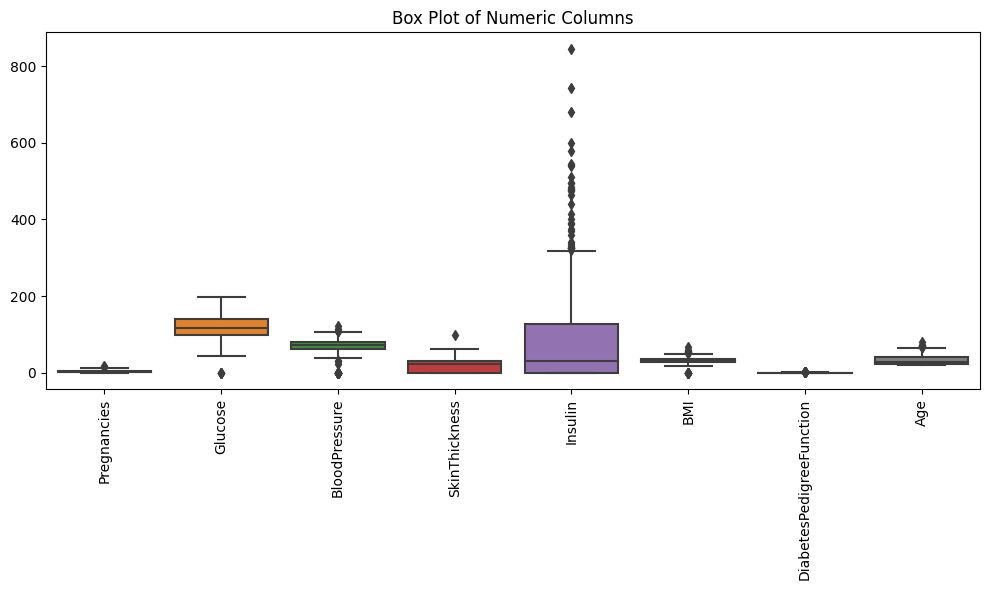

In [104]:
# Select the numeric columns
numeric_data = df.iloc[:, :-1]

# Create a box plot for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data)
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [105]:
# Assuming you have a DataFrame called 'data'
threshold = 275

# Filter the data to keep rows where 'Insulin' is less than or equal to the threshold
df = df[df['Insulin'] <= threshold]

In [106]:
# Assuming you have a DataFrame called 'data'
threshold = 0

# Filter the data to keep rows where 'Insulin' is less than or equal to the threshold
df = df[df['Insulin'] > threshold]

In [107]:
# Assuming you have a DataFrame called 'data'
threshold = 175
# Filter the data to keep rows where 'Insulin' is less than or equal to the threshold
df = df[df['Glucose'] < threshold]

In [108]:
# Assuming you have a DataFrame called 'data'
threshold = 100
# Filter the data to keep rows where 'Insulin' is less than or equal to the threshold
df = df[df['BloodPressure'] <= threshold]

In [109]:
# Assuming you have a DataFrame called 'data'
threshold = 60
# Filter the data to keep rows where 'Insulin' is less than or equal to the threshold
df = df[df['BMI'] <= threshold]

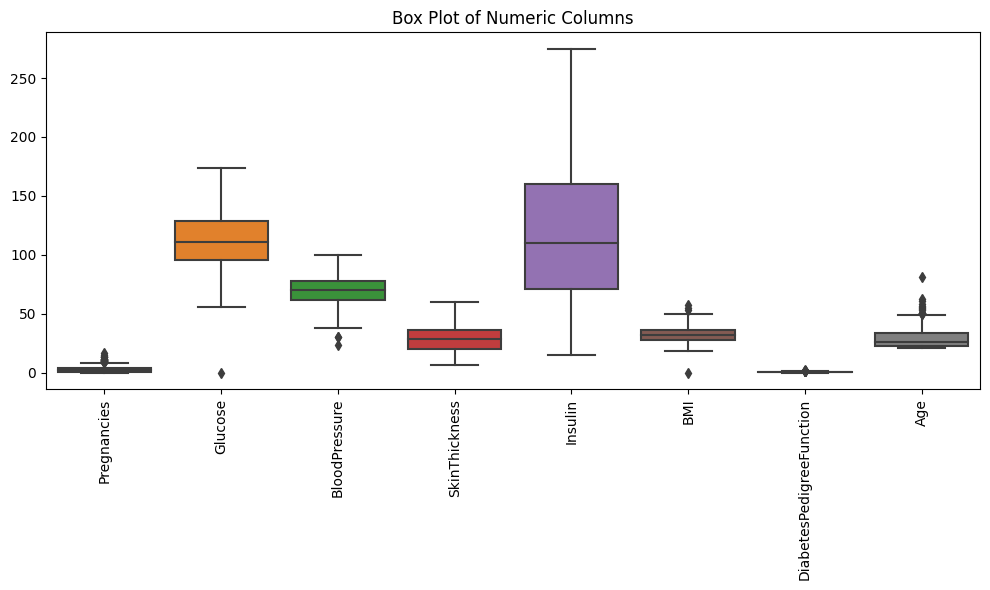

In [110]:
# Select the numeric columns
numeric_data = df.iloc[:, :-1]

# Create a box plot for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data)
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [111]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.662500,107.700000,68.666667,27.241667,107.479167,31.332083,0.470438,28.237500
1,4.627907,131.686047,72.697674,32.523256,148.372093,35.246512,0.646174,34.395349


0 --> Non-Diabetic
1 --> Diabetic

Outcome
0    240
1     86
Name: count, dtype: int64


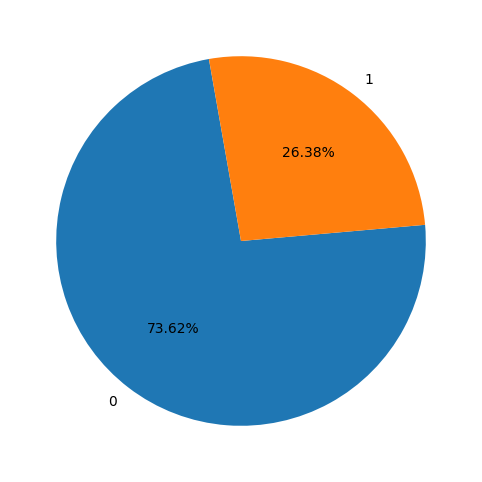

In [112]:
value_counts = df['Outcome'].value_counts()
print(value_counts)

plt.figure(figsize=(10,6))
plt.pie(value_counts, labels =value_counts.index,  autopct= '%1.2f%%',startangle =100)
plt.show()

In [113]:
from scipy import stats

for column in df.columns:
    skewness = df[column].skew()
    
    if skewness > 0:
        skew_type = "Right-skewed"
    elif skewness < 0:
        skew_type = "Left-skewed"
    else: 
        skew_type = "Approximately normally distributed"

    print(f"Column {column}: skewness = {skewness}, Distribution = {skew_type}")

Column Pregnancies: skewness = 1.522195020720312, Distribution = Right-skewed
Column Glucose: skewness = 0.1512073170974081, Distribution = Right-skewed
Column BloodPressure: skewness = -0.3747764423129933, Distribution = Left-skewed
Column SkinThickness: skewness = 0.24679784722778977, Distribution = Right-skewed
Column Insulin: skewness = 0.5356723020064492, Distribution = Right-skewed
Column BMI: skewness = 0.1399508594652501, Distribution = Right-skewed
Column DiabetesPedigreeFunction: skewness = 1.5151526888040976, Distribution = Right-skewed
Column Age: skewness = 1.6175471223350533, Distribution = Right-skewed
Column Outcome: skewness = 1.0768900013735283, Distribution = Right-skewed


What are the reasons to use StandardScaler or Min-Max Scaler:
Use StandardScaler for data with outliers or when the data is approximately normally distributed.
Use min-max scaling (Normalizer) to scale the data within a specific range, especially if you have non-normally distributed data.

# For Deployment to create cleaned Data Set

In [114]:
df.to_csv("Cleaned_data.csv")

# Modeling & Evaluation

In [115]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [116]:
X = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.1, random_state =42)

In [117]:
# transformations = [('scaler',MinMaxScaler(),list(X.columns))]
transformations = [('scaler', StandardScaler(),list(X.columns))]

# 1. LogisticRegression

In [118]:
pipeline = Pipeline(
    [('preprocessor', ColumnTransformer(transformers=transformations)), ('classifer', LogisticRegression(random_state=42, max_iter=1000))]
)

In [119]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('classifer',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [120]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [121]:
accuracy_train_lgr = accuracy_score(y_train,y_pred_train)
accuracy_test_lgr = accuracy_score(y_test,y_pred_test)
cm = confusion_matrix(y_test,y_pred_test)

print("Accuracy on train-lgr :", accuracy_train_lgr)
print("Accuracy on test-lgr :", accuracy_test_lgr)
print("Confusion Matrix-lgr :\n", cm)
print("For LogisticRegression:", classification_report(y_test,y_pred_test))

Accuracy on train-lgr : 0.8122866894197952
Accuracy on test-lgr : 0.8181818181818182
Confusion Matrix-lgr :
 [[23  2]
 [ 4  4]]
For LogisticRegression:               precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.67      0.50      0.57         8

    accuracy                           0.82        33
   macro avg       0.76      0.71      0.73        33
weighted avg       0.81      0.82      0.81        33



In [122]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.75757576 0.75384615 0.86153846 0.72307692 0.81538462]
Mean Accuracy: 0.7822843822843822


# 2. RandomForestClassifier

In [123]:
rf_pipeline = Pipeline(
    [('preprocessor', ColumnTransformer(transformers=transformations)), ('classifer', RandomForestClassifier(random_state=42, n_estimators=100))]
)

In [124]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('classifer', RandomForestClassifier(random_state=42))])

In [125]:
y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)

In [126]:
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
cm = confusion_matrix(y_test,y_pred_test_rf)

print("Accuracy on train-rf :", accuracy_train_lgr)
print("Accuracy on test-rf :", accuracy_test_lgr)
print("Confusion Matrix-rf :\n", cm)
print("For RandomForestClassifier:", classification_report(y_test,y_pred_test_rf))

Accuracy on train-rf : 0.8122866894197952
Accuracy on test-rf : 0.8181818181818182
Confusion Matrix-rf :
 [[22  3]
 [ 3  5]]
For RandomForestClassifier:               precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.62      0.62      0.62         8

    accuracy                           0.82        33
   macro avg       0.75      0.75      0.75        33
weighted avg       0.82      0.82      0.82        33



In [127]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.77272727 0.8        0.81538462 0.75384615 0.81538462]
Mean Accuracy: 0.7914685314685315


# 3. SVC

In [128]:
svm_pipeline = Pipeline(
    [('preprocessor', ColumnTransformer(transformers=transformations)), ('classifer', SVC(kernel='linear',C=1.0, random_state =42))]
)

In [129]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('classifer', SVC(kernel='linear', random_state=42))])

In [130]:
y_pred_train_svm = svm_pipeline.predict(X_train)
y_pred_test_svm = svm_pipeline.predict(X_test)

In [131]:
accuracy_train_svm = accuracy_score(y_train,y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test,y_pred_test_svm)
cm_svm = confusion_matrix(y_test,y_pred_test_svm)

print("Accuracy on train-svm :", accuracy_train_svm)
print("Accuracy on test-svm :", accuracy_test_svm)
print("Confusion Matrix-svm :\n", cm_svm)
print("For SVM:", classification_report(y_test,y_pred_test_svm))

Accuracy on train-svm : 0.7952218430034129
Accuracy on test-svm : 0.8181818181818182
Confusion Matrix-svm :
 [[23  2]
 [ 4  4]]
For SVM:               precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.67      0.50      0.57         8

    accuracy                           0.82        33
   macro avg       0.76      0.71      0.73        33
weighted avg       0.81      0.82      0.81        33



In [132]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(svm_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.77272727 0.73846154 0.83076923 0.72307692 0.81538462]
Mean Accuracy: 0.7760839160839161


# 4. XGB

In [133]:
xgb_pipeline = Pipeline(
    [('preprocessor', ColumnTransformer(transformers=transformations)), ('classifer', XGBClassifier())]
)

In [134]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('classifer',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [135]:
y_pred_train_xgb = xgb_pipeline.predict(X_train)
y_pred_test_xgb = xgb_pipeline.predict(X_test)

In [136]:
accuracy_train_xgb = accuracy_score(y_train,y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test,y_pred_test_xgb)
cm_xgb = confusion_matrix(y_test,y_pred_test_xgb)

print("Accuracy on train-xgb :", accuracy_train_xgb)
print("Accuracy on test-xgb :", accuracy_test_xgb)
print("Confusion Matrix-xgb :\n", cm_xgb)
print("For xgb:", classification_report(y_test,y_pred_test_xgb))

Accuracy on train-xgb : 1.0
Accuracy on test-xgb : 0.8484848484848485
Confusion Matrix-xgb :
 [[22  3]
 [ 2  6]]
For xgb:               precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.67      0.75      0.71         8

    accuracy                           0.85        33
   macro avg       0.79      0.81      0.80        33
weighted avg       0.86      0.85      0.85        33



In [137]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(xgb_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.75757576 0.78461538 0.75384615 0.72307692 0.76923077]
Mean Accuracy: 0.7576689976689976


Remark: The Random Forest classifier has proven to be a highly effective model for the task of diabetes prediction. The model's performance, as evidenced by the confusion matrix and evaluation metrics, demonstrates its capability in accurately classifying individuals into 'diabetes yes' or 'diabetes no'."

# Making a Predictive System

In [138]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [139]:
import numpy as np

# Prompt the user for input for each feature
pregnancies = float(input("Enter the number of pregnancies: "))
glucose = float(input("Enter the glucose level: "))
blood_pressure = float(input("Enter the blood pressure: "))
skin_thickness = float(input("Enter the skin thickness: "))
insulin = float(input("Enter the insulin level: "))
bmi = float(input("Enter the BMI: "))
diabetes_pedigree_function = float(input("Enter the Diabetes Pedigree Function: "))
age = float(input("Enter the age: "))

# Create an input data array
input_data = np.array([pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age])

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1, -1)

# Make a prediction using the RandomForest model
prediction = rf_pipeline.named_steps['classifer'].predict(input_data_reshaped)

# Check the prediction and provide an appropriate response
if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

Enter the number of pregnancies:  1
Enter the glucose level:  2
Enter the blood pressure:  3
Enter the skin thickness:  4
Enter the insulin level:  5
Enter the BMI:  6
Enter the Diabetes Pedigree Function:  7
Enter the age:  8


The person is diabetic


In [140]:
# For Deployment

In [141]:
import pickle

# Save the trained Random Forest model to a file
with open('RandomForestModel.pkl', 'wb') as model_file:
    pickle.dump(rf_pipeline, model_file)